In [159]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import pandas as pd
import pickle
import bz2
import datetime


In [160]:
model_file = f"modelfiles/temp/model.sav"

In [161]:
model_file_zip = f"modelfiles/TMAX-MN-model.sav.bz2"

In [162]:
with bz2.open(model_file_zip, "rb") as fin:
            data = fin.read()
            f = open(model_file, "wb")
            f.write(data)
            f.close()

In [163]:
model = pickle.load(open(model_file, "rb"))

In [164]:
sc = StandardScaler()
scaler_file = f"modelfiles/TMAX-MN-scaler.sav"
sc = pickle.load(open(scaler_file,'rb'))

In [165]:
year=2020
year_before=year-1 
year_after=year+1

In [166]:
df=pd.DataFrame(pd.date_range(f'{year_before}-01-01', f'{year_after}-12-31', freq='D'), columns=['date'])
df

,date
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
1091,2021-12-27
1092,2021-12-28
1093,2021-12-29
1094,2021-12-30


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1096 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.7 KB


In [168]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df

,date,year,month,day
0,2019-01-01,2019,1,1
1,2019-01-02,2019,1,2
2,2019-01-03,2019,1,3
3,2019-01-04,2019,1,4
4,2019-01-05,2019,1,5
...,...,...,...,...
1091,2021-12-27,2021,12,27
1092,2021-12-28,2021,12,28
1093,2021-12-29,2021,12,29
1094,2021-12-30,2021,12,30


In [169]:
#df.drop(["date"],inplace=True,axis=1)

In [170]:
df

,date,year,month,day
0,2019-01-01,2019,1,1
1,2019-01-02,2019,1,2
2,2019-01-03,2019,1,3
3,2019-01-04,2019,1,4
4,2019-01-05,2019,1,5
...,...,...,...,...
1091,2021-12-27,2021,12,27
1092,2021-12-28,2021,12,28
1093,2021-12-29,2021,12,29
1094,2021-12-30,2021,12,30


In [171]:
row = sc.transform(df[['year','month','day']].values)

In [172]:
prediction_result = model.predict(row)

In [173]:
prediction_result

array([3.11033515, 3.11033515, 3.41002792, ..., 3.91040855, 3.8938863 ,
       3.65288899])

In [174]:
df['predicted']=prediction_result

In [175]:
df

,date,year,month,day,predicted
0,2019-01-01,2019,1,1,3.110335
1,2019-01-02,2019,1,2,3.110335
2,2019-01-03,2019,1,3,3.410028
3,2019-01-04,2019,1,4,3.419423
4,2019-01-05,2019,1,5,3.419423
...,...,...,...,...,...
1091,2021-12-27,2021,12,27,4.969999
1092,2021-12-28,2021,12,28,4.030052
1093,2021-12-29,2021,12,29,3.910409
1094,2021-12-30,2021,12,30,3.893886


In [176]:
def getActualByYear(df,state_code,year_before,year_after):
            print("test")
            print(df.info)
            dt1 = datetime.datetime(year_before, 1, 1)
            dt2 = datetime.datetime(year_after, 12, 31)
            new_df = df.loc[(df['state_code'] == state_code) & (df['date'] >= dt1.strftime("%Y-%m-%d")) & (df['date'] <= dt2.strftime("%Y-%m-%d")) ]
            return new_df   

In [177]:
tmax_df = pd.read_csv('../../data/cleaned_data/tmaxdata.csv',names=["state_code", "date", "value"])
tmax_df

,state_code,date,value
0,AK,1905-01-01,6.1
1,AK,1905-01-02,7.2
2,AK,1905-01-03,5.0
3,AK,1905-01-04,5.6
4,AK,1905-01-05,5.6
...,...,...,...
2154261,WY,2022-08-07,30.6
2154262,WY,2022-08-08,35.6
2154263,WY,2022-08-09,37.8
2154264,WY,2022-08-10,40.0


In [178]:
new_df=getActualByYear(tmax_df,"MN",2019,2021)
new_df

test
<bound method DataFrame.info of         state_code        date  value
0               AK  1905-01-01    6.1
1               AK  1905-01-02    7.2
2               AK  1905-01-03    5.0
3               AK  1905-01-04    5.6
4               AK  1905-01-05    5.6
...            ...         ...    ...
2154261         WY  2022-08-07   30.6
2154262         WY  2022-08-08   35.6
2154263         WY  2022-08-09   37.8
2154264         WY  2022-08-10   40.0
2154265         WY  2022-08-11   39.4

[2154266 rows x 3 columns]>


,state_code,date,value
2096346,MN,2019-01-01,2.2
2096347,MN,2019-01-02,-0.6
2096348,MN,2019-01-03,6.7
2096349,MN,2019-01-04,8.9
2096350,MN,2019-01-05,9.4
...,...,...,...
2133256,MN,2021-12-27,7.2
2133257,MN,2021-12-28,1.7
2133258,MN,2021-12-29,0.6
2133259,MN,2021-12-30,-1.1


In [181]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1096 non-null   object 
 1   year       1096 non-null   int64  
 2   month      1096 non-null   int64  
 3   day        1096 non-null   int64  
 4   predicted  1096 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 42.9+ KB


,date,year,month,day,predicted
0,2019-01-01,2019,1,1,3.110335
1,2019-01-02,2019,1,2,3.110335
2,2019-01-03,2019,1,3,3.410028
3,2019-01-04,2019,1,4,3.419423
4,2019-01-05,2019,1,5,3.419423
...,...,...,...,...,...
1091,2021-12-27,2021,12,27,4.969999
1092,2021-12-28,2021,12,28,4.030052
1093,2021-12-29,2021,12,29,3.910409
1094,2021-12-30,2021,12,30,3.893886


In [180]:
#new_df['date'] = pd.to_datetime(new_df['date'])
df['date']=df['date'].dt.strftime('%Y-%m-%d')
df

,date,year,month,day,predicted
0,2019-01-01,2019,1,1,3.110335
1,2019-01-02,2019,1,2,3.110335
2,2019-01-03,2019,1,3,3.410028
3,2019-01-04,2019,1,4,3.419423
4,2019-01-05,2019,1,5,3.419423
...,...,...,...,...,...
1091,2021-12-27,2021,12,27,4.969999
1092,2021-12-28,2021,12,28,4.030052
1093,2021-12-29,2021,12,29,3.910409
1094,2021-12-30,2021,12,30,3.893886


In [182]:
final_df=pd.DataFrame()
final_df=df.merge(new_df,on="date",how="left")

<AxesSubplot:xlabel='date'>

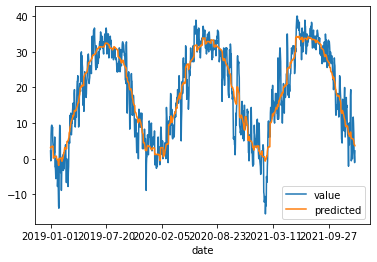

In [183]:
final_df.plot(x="date",y=["value","predicted"])

In [184]:
final_df.drop(["state_code","year","month","year","day"],inplace=True,axis=1)
final_df.rename({"value":"actual"},axis=1,inplace=True)
final_df

,date,predicted,actual
0,2019-01-01,3.110335,2.2
1,2019-01-02,3.110335,-0.6
2,2019-01-03,3.410028,6.7
3,2019-01-04,3.419423,8.9
4,2019-01-05,3.419423,9.4
...,...,...,...
1091,2021-12-27,4.969999,7.2
1092,2021-12-28,4.030052,1.7
1093,2021-12-29,3.910409,0.6
1094,2021-12-30,3.893886,-1.1


In [185]:
import json
x=json.loads(df.to_json(orient="records"))

In [186]:
x

[{'date': '2019-01-01',
  'year': 2019,
  'month': 1,
  'day': 1,
  'predicted': 3.1103351511},
 {'date': '2019-01-02',
  'year': 2019,
  'month': 1,
  'day': 2,
  'predicted': 3.1103351511},
 {'date': '2019-01-03',
  'year': 2019,
  'month': 1,
  'day': 3,
  'predicted': 3.4100279219},
 {'date': '2019-01-04',
  'year': 2019,
  'month': 1,
  'day': 4,
  'predicted': 3.4194229759},
 {'date': '2019-01-05',
  'year': 2019,
  'month': 1,
  'day': 5,
  'predicted': 3.4194229759},
 {'date': '2019-01-06',
  'year': 2019,
  'month': 1,
  'day': 6,
  'predicted': 3.4194229759},
 {'date': '2019-01-07',
  'year': 2019,
  'month': 1,
  'day': 7,
  'predicted': 3.4194229759},
 {'date': '2019-01-08',
  'year': 2019,
  'month': 1,
  'day': 8,
  'predicted': 3.4194229759},
 {'date': '2019-01-09',
  'year': 2019,
  'month': 1,
  'day': 9,
  'predicted': 3.5496073021},
 {'date': '2019-01-10',
  'year': 2019,
  'month': 1,
  'day': 10,
  'predicted': 3.4630465428},
 {'date': '2019-01-11',
  'year': 2019,